In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_train=pd.read_csv("Titanic_train.csv")
titanic_test=pd.read_csv("Titanic_test.csv")

In [3]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_train=titanic_train.drop(["Name","Ticket","Cabin"],axis=1)

In [8]:
titanic_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


### Data Preprocessing

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
titanic_train["Embarked"].fillna(titanic_train["Embarked"].mode()[0],inplace=True)
titanic_train["Age"].fillna(titanic_train["Age"].mean(),inplace=True)

In [12]:
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1c230ed5070>,
 'caps': [<matplotlib.lines.Line2D at 0x1c230eaa1b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c230ab97c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c230ed5b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c230ed5e80>],
 'means': []}

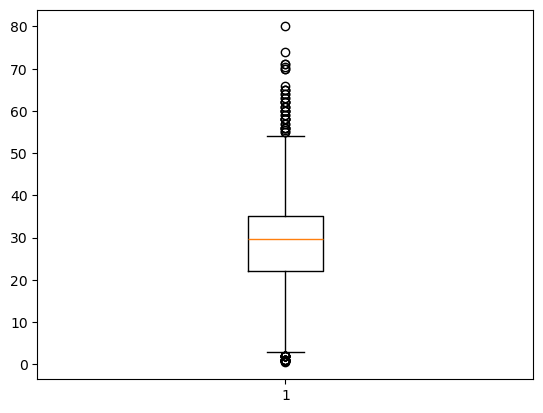

In [13]:
plt.boxplot(titanic_train["Age"])

In [21]:
# Detect and treat outliers (if necessary)
# Using IQR method (adjust thresholds as needed)
Q1 = titanic_train["Age"].quantile(0.25)
Q3 = titanic_train["Age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
titanic_train= titanic_train[(titanic_train["Age"] >= lower_bound) & (titanic_train["Age"] <= upper_bound)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1c2317912b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c231791880>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c231722450>],
 'medians': [<matplotlib.lines.Line2D at 0x1c231791dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c2317920c0>],
 'means': []}

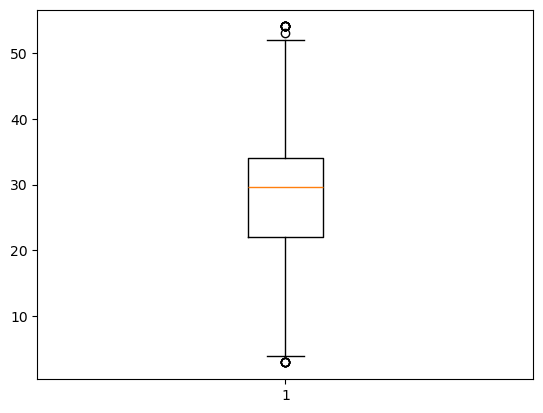

In [28]:
plt.boxplot(titanic_train["Age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c2317e2de0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c2317e33e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c2317e2ab0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c2317e3890>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c2317e3b30>],
 'means': []}

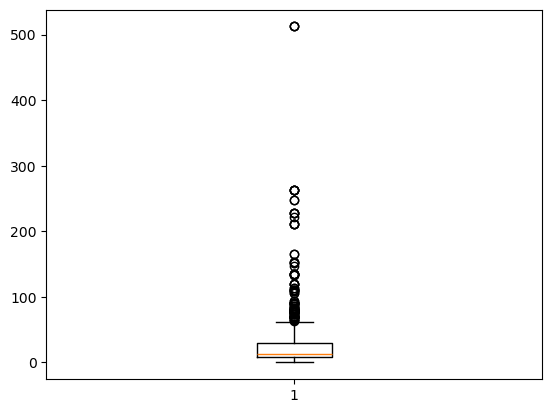

In [30]:
plt.boxplot(titanic_train["Fare"])

In [32]:
Q1 = titanic_train["Fare"].quantile(0.25)
Q3 = titanic_train["Fare"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
titanic_train= titanic_train[(titanic_train["Fare"] >= lower_bound) & (titanic_train["Fare"] <= upper_bound)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1c231865730>,
 'caps': [<matplotlib.lines.Line2D at 0x1c231865d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c231832450>],
 'medians': [<matplotlib.lines.Line2D at 0x1c2318661b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c2318664e0>],
 'means': []}

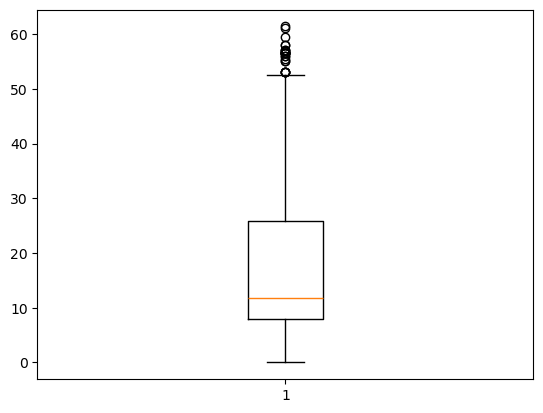

In [34]:
plt.boxplot(titanic_train["Fare"])

In [36]:
from sklearn import preprocessing

In [37]:
label_encoder = preprocessing.LabelEncoder()
titanic_train["Pclass"]= label_encoder.fit_transform(titanic_train["Pclass"])
titanic_train["Sex"]= label_encoder.fit_transform(titanic_train["Sex"])
titanic_train["Embarked"]= label_encoder.fit_transform(titanic_train["Embarked"])

In [40]:
titanic_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,2,1,22.000000,1,0,7.2500,2
2,3,1,2,0,26.000000,0,0,7.9250,2
3,4,1,0,0,35.000000,1,0,53.1000,2
4,5,0,2,1,35.000000,0,0,8.0500,2
5,6,0,2,1,29.699118,0,0,8.4583,1
...,...,...,...,...,...,...,...,...,...
886,887,0,1,1,27.000000,0,0,13.0000,2
887,888,1,0,0,19.000000,0,0,30.0000,2
888,889,0,2,0,29.699118,1,2,23.4500,2
889,890,1,0,1,26.000000,0,0,30.0000,0


In [42]:
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [44]:
titanic_test=titanic_test.drop(["Name","Ticket","Cabin"],axis=1)

In [46]:
titanic_test["Pclass"]= label_encoder.fit_transform(titanic_test["Pclass"])
titanic_test["Sex"]= label_encoder.fit_transform(titanic_test["Sex"])
titanic_test["Embarked"]= label_encoder.fit_transform(titanic_test["Embarked"])

In [48]:
titanic_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,2,1,34.5,0,0,7.8292,1
1,893,2,0,47.0,1,0,7.0000,2
2,894,1,1,62.0,0,0,9.6875,1
3,895,2,1,27.0,0,0,8.6625,2
4,896,2,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,1305,2,1,NaN,0,0,8.0500,2
414,1306,0,0,39.0,0,0,108.9000,0
415,1307,2,1,38.5,0,0,7.2500,2
416,1308,2,1,NaN,0,0,8.0500,2


In [50]:
titanic_test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [52]:
titanic_test["Age"].fillna(titanic_test["Age"].mean(),inplace=True)
titanic_test["Fare"].fillna(titanic_test["Fare"].mean(),inplace=True)

In [54]:
titanic_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### Data  Visualization

<Axes: xlabel='Survived'>

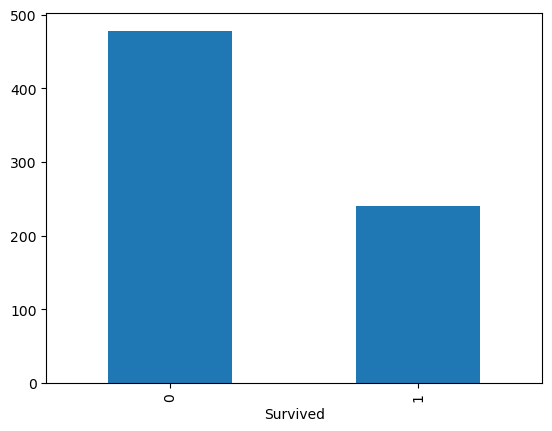

In [57]:
titanic_train["Survived"].value_counts().plot(kind="bar")

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Embarked'}>]], dtype=object)

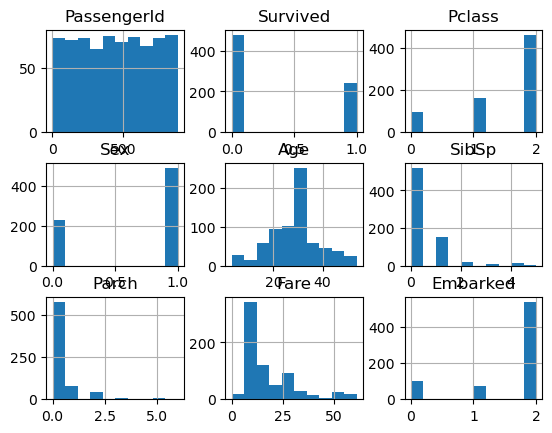

In [59]:
titanic_train.hist()

<Axes: xlabel='Pclass'>

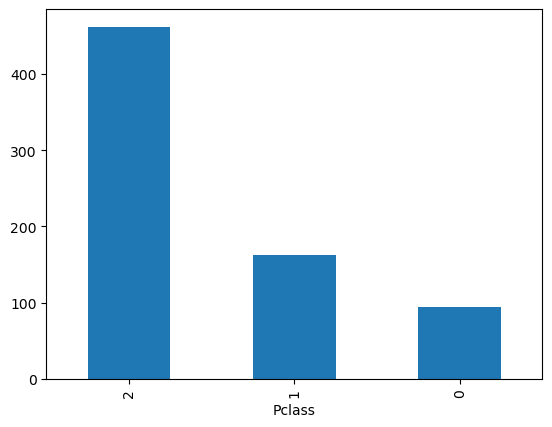

In [60]:
titanic_train["Pclass"].value_counts().plot(kind="bar")

<Axes: xlabel='Sex'>

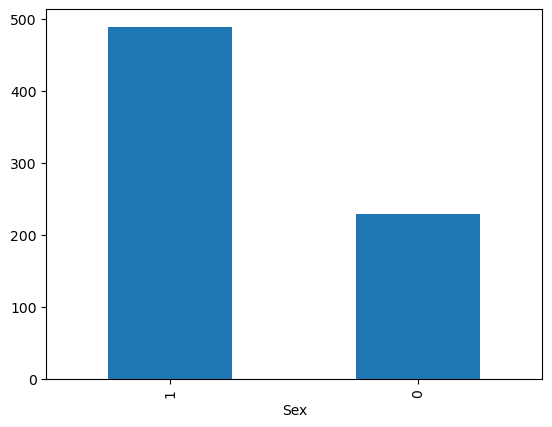

In [61]:
titanic_train["Sex"].value_counts().plot(kind="bar")

<Axes: xlabel='SibSp'>

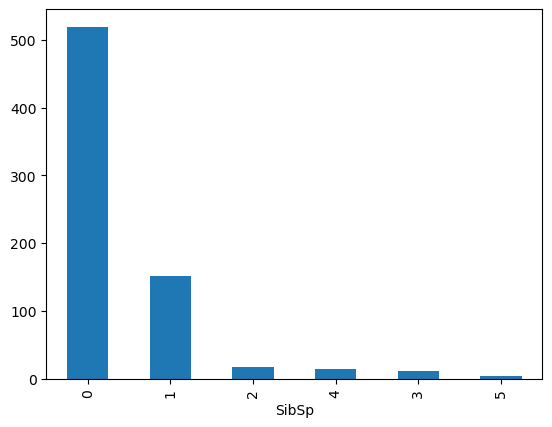

In [63]:
titanic_train["SibSp"].value_counts().plot(kind="bar")

<Axes: xlabel='Parch'>

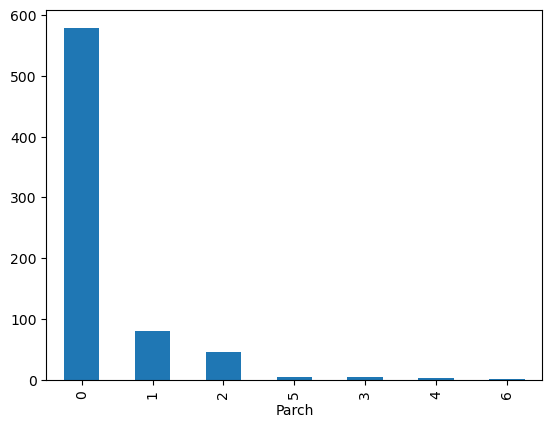

In [66]:
titanic_train["Parch"].value_counts().plot(kind="bar")

<Axes: xlabel='Embarked'>

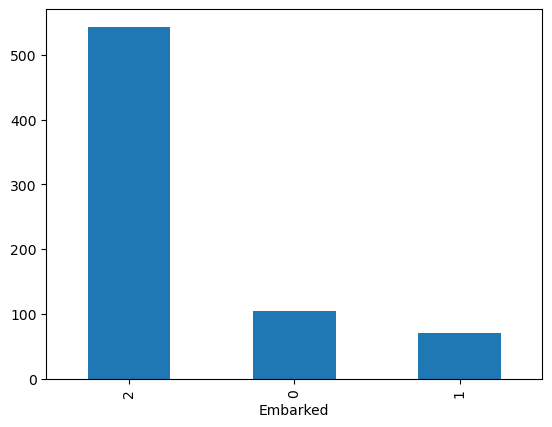

In [69]:
titanic_train["Embarked"].value_counts().plot(kind="bar")

<Axes: xlabel='Survived', ylabel='Fare'>

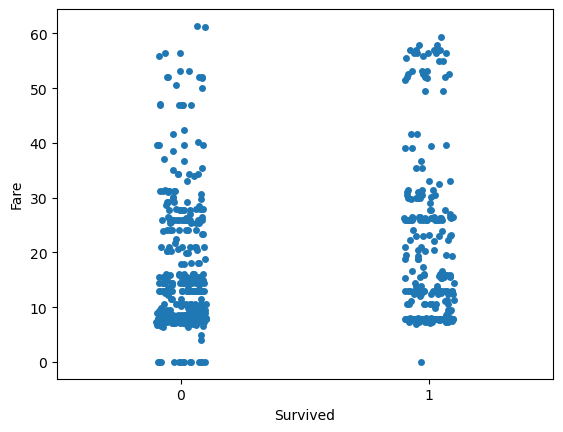

In [71]:
#Grouping with stripplot()
sns.stripplot(x='Survived', y='Fare', data=titanic_train)

<Axes: xlabel='SibSp', ylabel='Fare'>

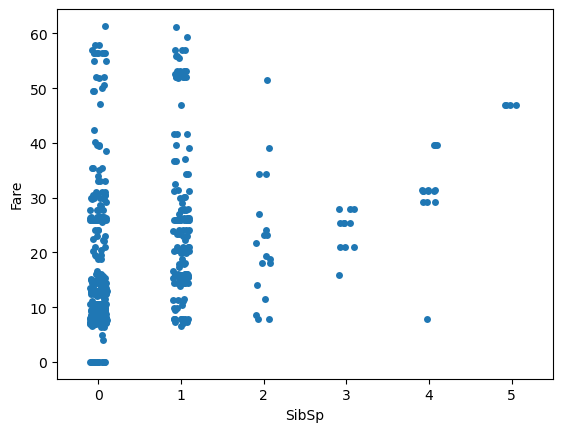

In [73]:
sns.stripplot(x='SibSp', y='Fare', data=titanic_train)

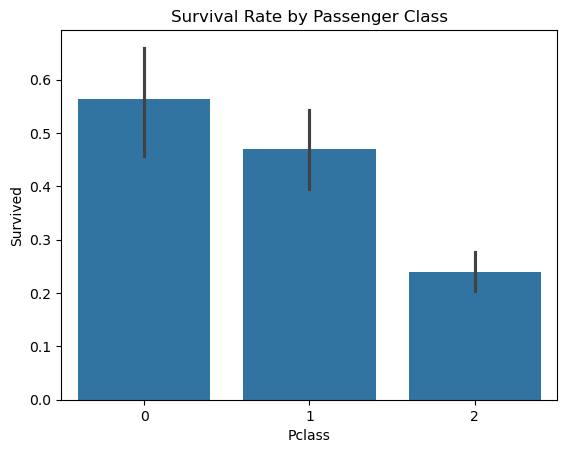

In [75]:
sns.barplot(x='Pclass', y='Survived', data=titanic_train)
plt.title('Survival Rate by Passenger Class')
plt.show()

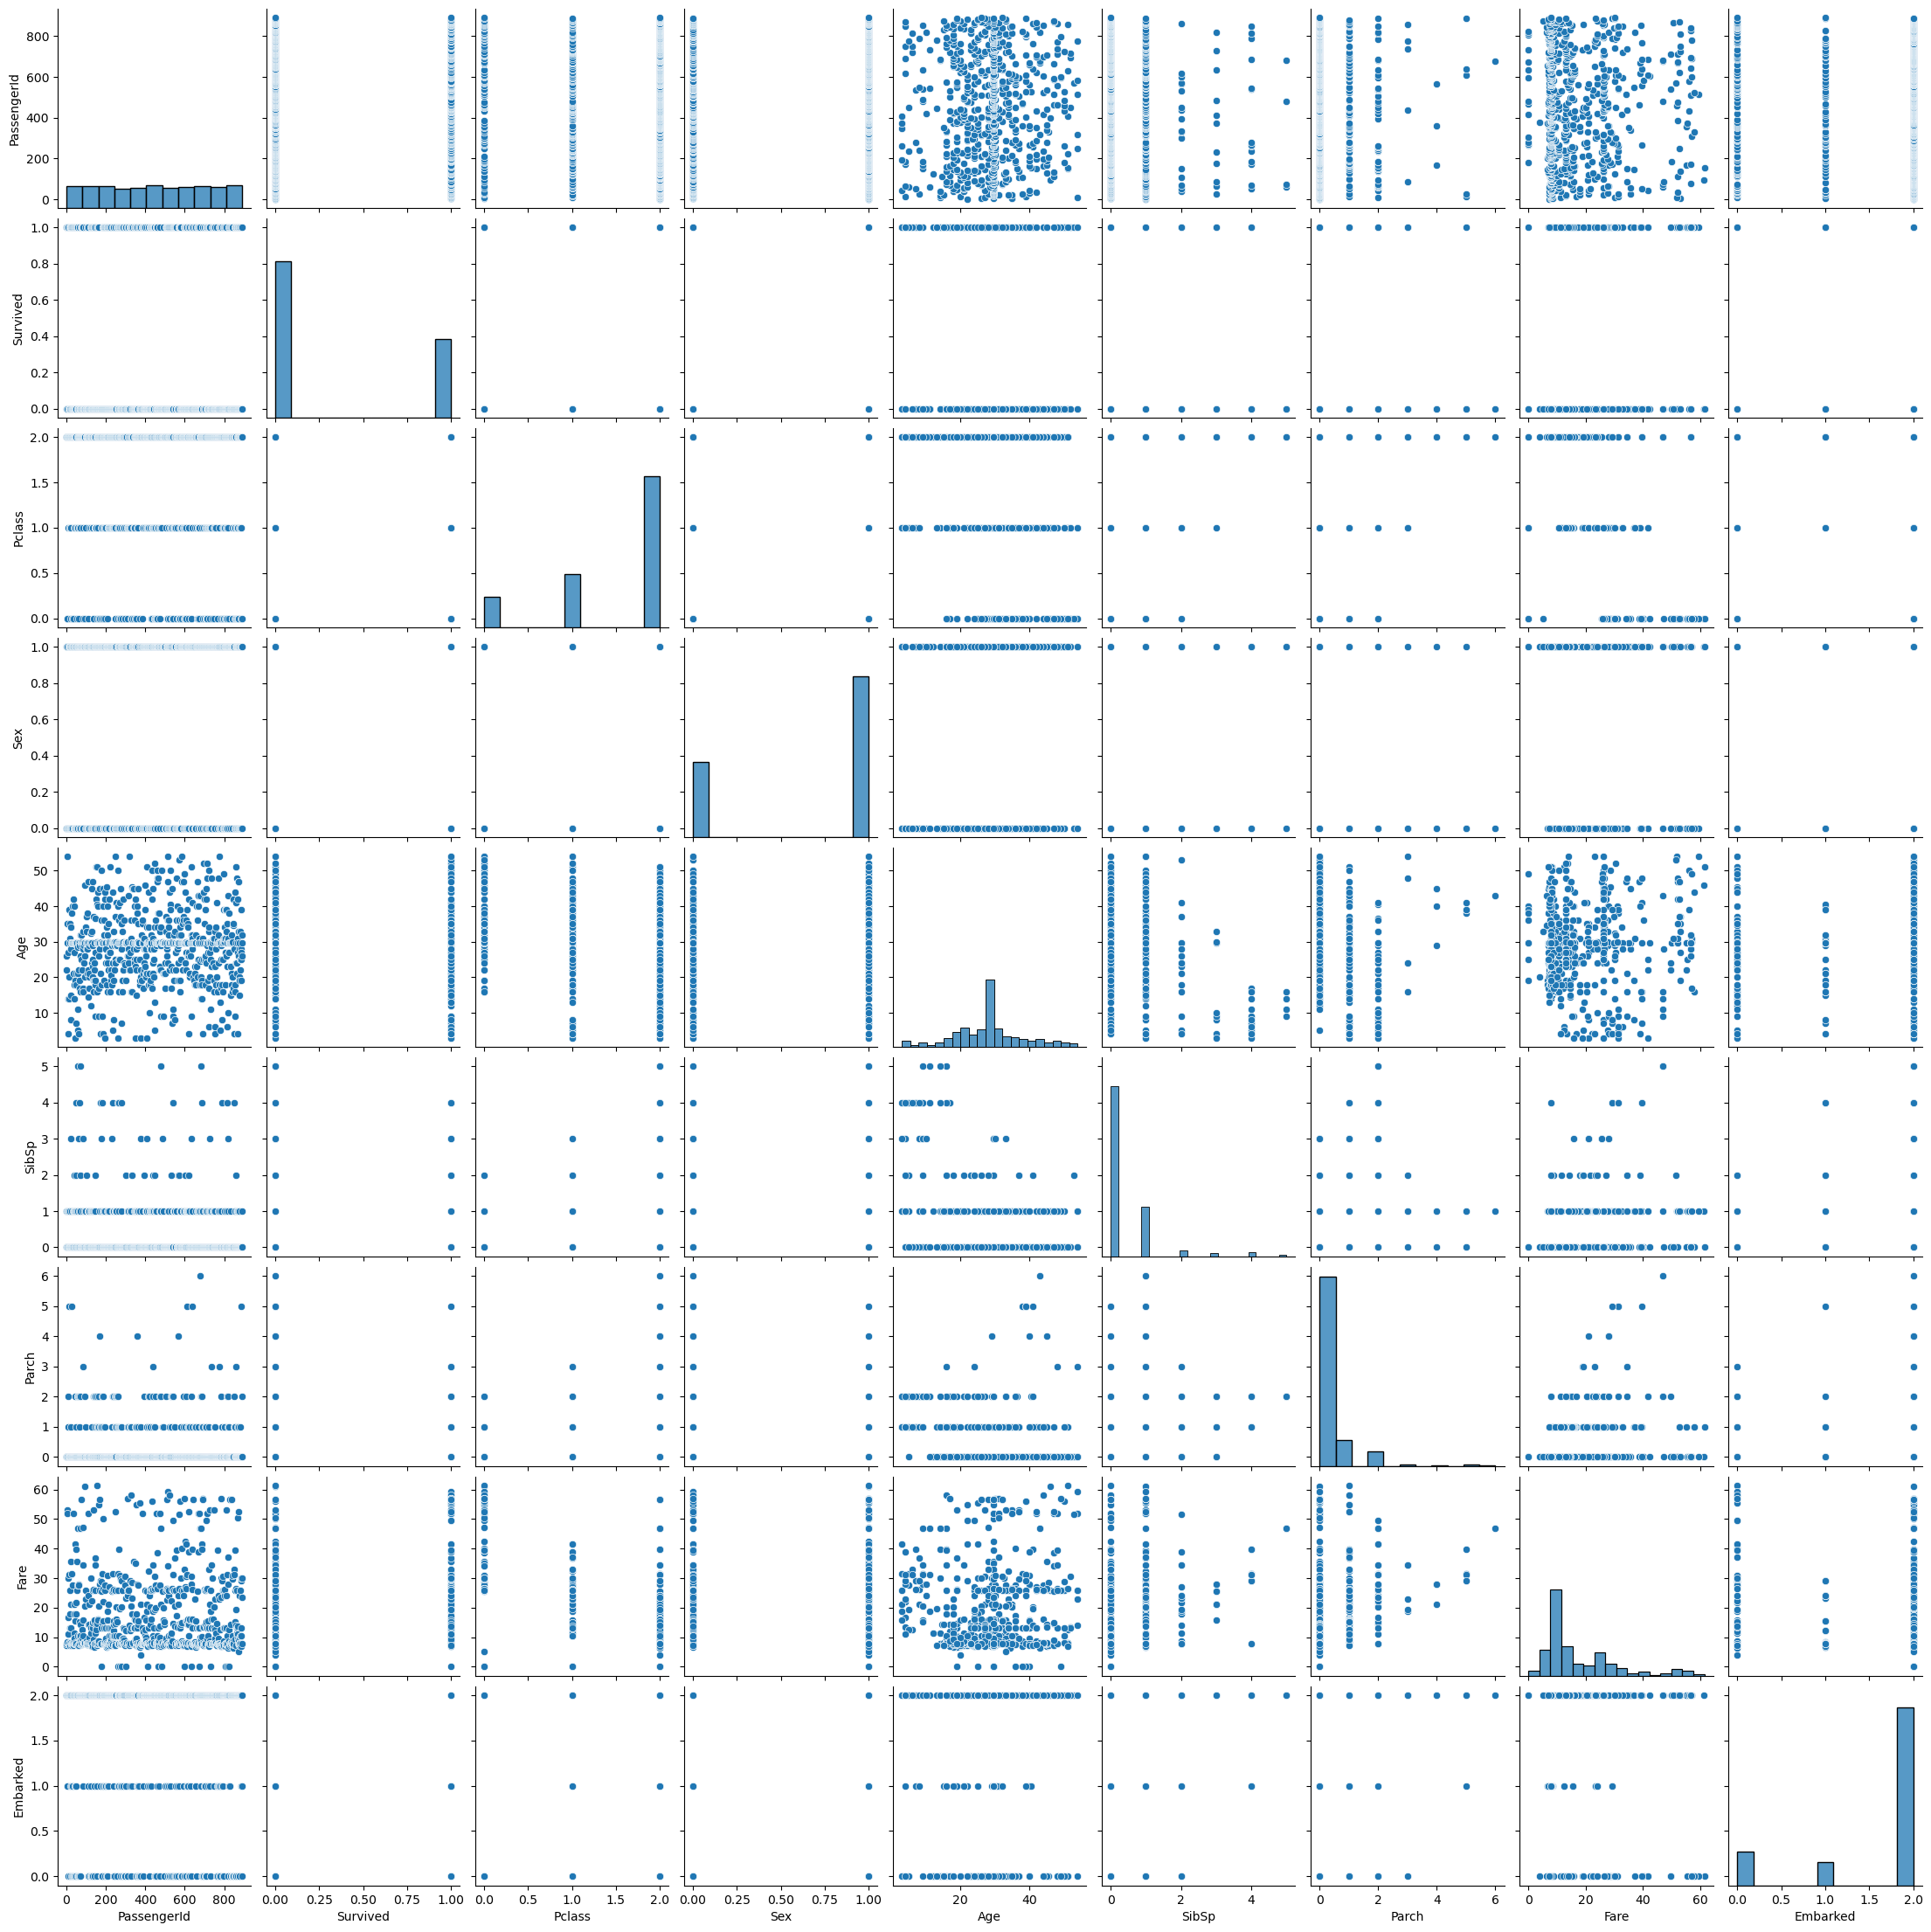

In [77]:
sns.pairplot(titanic_train)

### Logistic Regression Model

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [80]:
x=titanic_train[["PassengerId","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
y=titanic_train[["Survived"]]

In [81]:
# split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [82]:
# fit model no training data
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [83]:
# make predictions for test data
y_pred = model.predict(x_test)

In [84]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [85]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.08%


In [86]:
# predictions for titanic test data
y_pred1 = model.predict(titanic_test)

In [87]:
y_pred1

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

### Model Evaluation

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83        98
           1       0.64      0.65      0.65        46

    accuracy                           0.77       144
   macro avg       0.74      0.74      0.74       144
weighted avg       0.77      0.77      0.77       144



In [90]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix)

[[81 17]
 [16 30]]


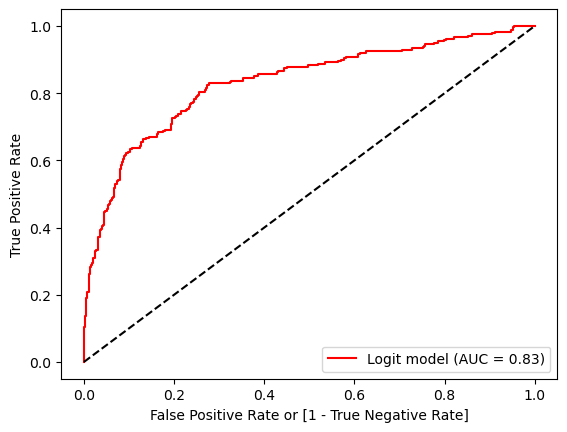

In [91]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Ensure y and model.predict_proba(x) are consistent
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(x)[:, 1])

# Calculate AUC score correctly using predicted probabilities
auc = roc_auc_score(y, model.predict_proba(x)[:, 1])

plt.plot(fpr, tpr, color='red', label='Logit model (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [92]:
auc

0.8311018131101813

### Interpretation

In [94]:
# Get the coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 1.91083121e-04 -1.88782716e-01 -2.40638130e+00 -2.12539701e-02
 -3.30344036e-01 -2.89844706e-01  4.98076516e-02 -2.71531584e-01]
Intercept: 1.3111587617792606


In [95]:
import statsmodels.api as sm
# Add a constant to the feature matrix for the intercept term
X_train_with_intercept = sm.add_constant(x_train)

# Fit the model using statsmodels
logit_model = sm.Logit(y_train, X_train_with_intercept)
result = logit_model.fit()

# Print the summary which includes p-values
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.442777
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  574
Model:                          Logit   Df Residuals:                      565
Method:                           MLE   Df Model:                            8
Date:                Fri, 04 Oct 2024   Pseudo R-squ.:                  0.3078
Time:                        18:49:05   Log-Likelihood:                -254.15
converged:                       True   LL-Null:                       -367.18
Covariance Type:            nonrobust   LLR p-value:                 2.026e-44
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.0807      0.748      5.459      0.000       2.615       5.546
PassengerId    -0.0004    

### Deployment with Streamlit

In [122]:
# Save the Streamlit app to a Python file
streamlit_code = """
import pandas as pd
import numpy as np
import streamlit as st
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Load the Titanic dataset
titanic_train = pd.read_csv("Titanic_train.csv")

# Preprocess the data (same as in the notebook)
titanic_train["Embarked"].fillna(titanic_train["Embarked"].mode()[0], inplace=True)
titanic_train["Age"].fillna(titanic_train["Age"].mean(), inplace=True)

# Initialize LabelEncoders
label_encoder_sex = LabelEncoder()
titanic_train["Sex"] = label_encoder_sex.fit_transform(titanic_train["Sex"])

label_encoder_embarked = LabelEncoder()
titanic_train["Embarked"] = label_encoder_embarked.fit_transform(titanic_train["Embarked"])

# Prepare input data for prediction
X = titanic_train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
y = titanic_train["Survived"]

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# Streamlit app
st.title('Titanic Survival Prediction App')
pclass = st.selectbox('Passenger Class', [1, 2, 3])
sex = st.selectbox('Sex', ['Male', 'Female'])
age = st.slider('Age', 1, 100)
sibsp = st.slider('Number of Siblings/Spouses Aboard', 0, 8)
parch = st.slider('Number of Parents/Children Aboard', 0, 6)
fare = st.slider('Fare Paid', 0, 500)
embarked = st.selectbox('Port of Embarkation', ['S', 'C', 'Q'])

# Convert input to the encoded format for the model
input_data = [
    pclass,  
    label_encoder_sex.transform([sex.lower()])[0],  
    age, 
    sibsp, 
    parch, 
    fare, 
    label_encoder_embarked.transform([embarked])[0]
]

if st.button('Predict Survival'):
    prediction = model.predict([input_data])[0]
    probability = model.predict_proba([input_data])[0][1]
    st.write(f"Prediction: {'Survived' if prediction == 1 else 'Did Not Survive'}")
    st.write(f"Probability of Survival: {probability:.2f}")
"""


In [124]:
# Save the Streamlit app code to a Python file
with open("titanic_app.py", "w") as f:
    f.write(streamlit_code)

In [126]:
# Run the Streamlit app
import subprocess
def run_streamlit():
    subprocess.Popen(["streamlit", "run", "titanic_app.py"])

run_streamlit()

In [128]:
print("Streamlit app is running. Open the link below in your web browser:")
print("http://localhost:8501")

Streamlit app is running. Open the link below in your web browser:
http://localhost:8501


### Interview Questions

### Precision vs. Recall:

Precision is the proportion of positive identifications that were actually correct.

Recall is the proportion of actual positives that were correctly identified.

Use precision when the cost of false positives is high, and recall when false negatives are more costly.

### Cross-Validation:

Cross-validation is a technique to evaluate model performance by splitting data into multiple subsets. It helps in checking model stability and avoiding overfitting, especially in binary classification.